### A. Readme First
- Apabila kalian pengguna Ubuntu dari versi 14.04 hingga latest version, kalian bisa langsung menjalankan `Cell` &#8594; `Run All`.
- Apabila kalian bukan salah satu pengguna Ubuntu versi 14.04 hingga latest version, diharapkan untuk mengunduh dan mengekstrasi `Tugas Lab 3 - Images` dan melakukan ekstrasi hasilnya tepat di sebelah `MRS-Lab 3-A-2006609645-A-2006560876.ipynb` lalu menjalankan `Cell` &#8594; `Run All`.

### B. Persiapan Lingkungan Laboratorium
- Melakukan _install package_/_dependency_ yang diperlukan untuk `Tugas Laboratorium 3` kali ini.
- Melakukan _import library_ yang akan digunakan pada `Tugas Laboratorium 3` kali ini.
- Mengunduh dan mengekstrasi dokumen pendukung untuk tugas ini.

#### 1. Instalasi _Package_/_Dependency_
_Install dependency_ tidaklah wajib. Tetapi bisa jadi ada beberapa _dependency_ di bawah ini yang belum terinstall.

In [ ]:
pip install numpy scikit-image matplotlib gdown scipy

#### 2. Melakukan _Import Library_ 

In [11]:
from skimage import color, exposure, filters, io, morphology, util
from skimage.transform import rescale
from skimage.morphology import closing, disk, dilation, erosion, opening, diamond, rectangle, star
from skimage.morphology import black_tophat, white_tophat
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy.ndimage.morphology import binary_hit_or_miss

#### 3. Unduh dan Ekstrasi Dokumen Pendukung

In [2]:
os.system('gdown https://drive.google.com/uc?id=1Xzw98BVg8xhBdqet0VMFe3h74cm_Mata')
os.system('unzip Tugas\ Lab\ 3\ -\ Images.zip')

256

### C. Soal 

1. **[50] Noise Removal** \
Diberikan sebuah citra sidik jari bernama `noisy_fingerprint.jpg`. Sayangnya citra ini memiliki _noise_ berupa bintik-bintik putih yang mengganggu di sekitar sidik jari.
![noisy_fingerprint.jpg](Tugas%20Lab%203%20-%20Images/noisy_fingerprint.jpg)
    - [20] Bersihkan _noise_ pada gambar di atas menggunakan _morphology operator_!
    - [15] Ceritakan mengapa Anda mengerjakan poin pertama dengan cara tersebut?
    - [15] Sebelumnya Anda pernah melakukan penghilangan _noise_ dengan menggunakan _median_ dan _mean filter_ di Lab 1. Apa perbedaannya dengan penghilangan _noise_ di Lab 3 ini?

##### a. Membersihkan _noise_ menggunakan operator $\text{Opening } \oplus$

In [3]:
basePath = 'Tugas Lab 3 - Images/'
def getPath(fileName):
    return basePath + fileName

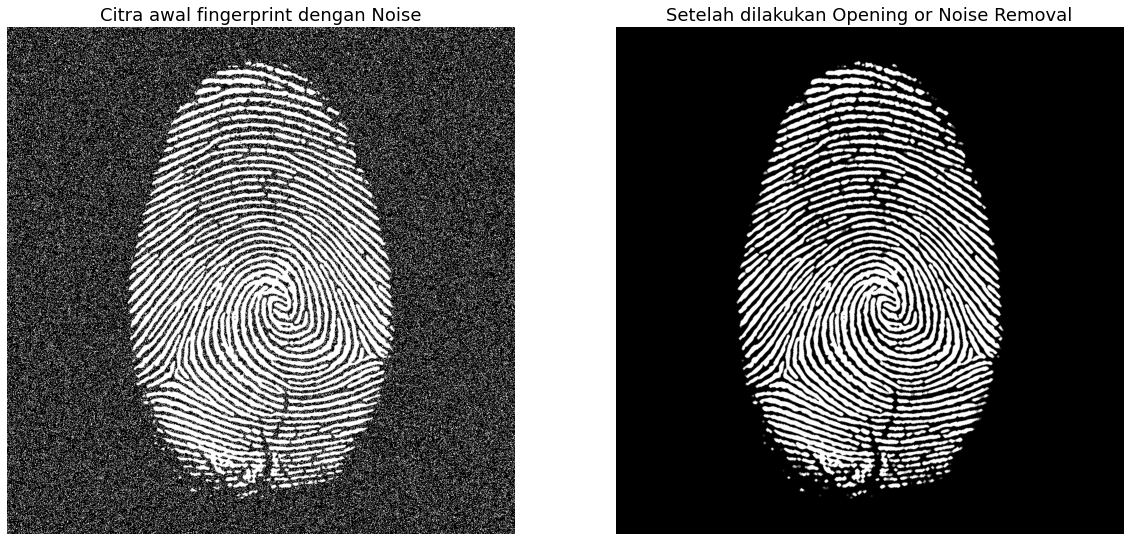

In [24]:
noisy_fingerprint_image = util.img_as_ubyte(io.imread(getPath('noisy_fingerprint.jpg')))

opening_se = disk(2)
opened = opening(noisy_fingerprint_image, opening_se)

## Menampilkan Citra
plt.figure(figsize=(20,10))
plt.rc('font', size=15)
plt.subplot(1,2,1)
plt.title('Citra awal fingerprint dengan Noise')
plt.imshow(noisy_fingerprint_image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Setelah dilakukan Opening or Noise Removal')
plt.imshow(opened, cmap='gray')
plt.axis('off')
plt.show()

##### b. Alasan menggunakan operator $\text{Opening } \oplus$

- Pada citra awal fingerprint dengan noise, terlihat bahwa terdapat banyak noise berupa bintik-bintik putih kecil pada citra.
- Ekspektasi untuk menghilangkan noise adalah menghilangkan bintik-bintik kecil putih tersebut.
- Dari operator-operator dasar yang dipelajari pada pengantar sesi $\text{Lab 3}$ kali ini, operator $\text{Opening } \oplus$ yang paling cocok untuk menangani masalah tersebut.
- Hal ini didasari dengan operator $\text{Opening } \oplus$ berguna untuk membuang objek kecil dari sebuah citra dan tetap mempertahankan bentuk dan ukuran objek besar di dalam citra.
- Alasan pemilihan ukuran _disk_-nya 2 adalah berdasarkan hasil eksperimen, kalau lebih dari 2 sudah mulai rusak objek _fingerprint_-nya. Bila menggunakan ukuran _disk_-nya 1, masih terdapat bintik-bintik kecil yang belum dihilangkan.

##### c. Perbedaan noise removal dengan $\text{Lab 1}$ 

Untuk mendapatkan _insight_ yang lebih baik, kami melakukan pengaplikasian _median_ dan _mean filter_ untuk perbandingan ketiga hasil citra terlebih dahulu.

In [5]:
## Mendapatkan hasil dari median filter
median_filter_citra = filters.rank.median(image=noisy_fingerprint_image,selem=morphology.square(9))

## Mendapatkan hasil dari mean filter
mean_filter_citra = filters.rank.mean(image=noisy_fingerprint_image,selem=morphology.square(9))

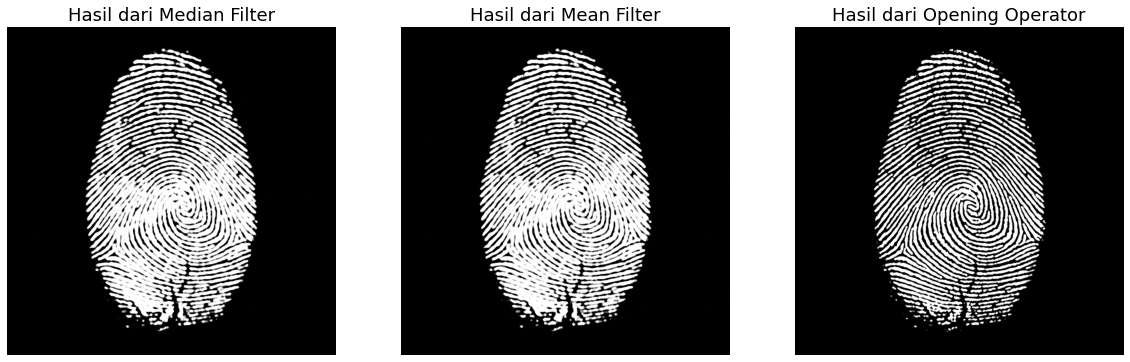

In [6]:
## Membandingkan hasil untuk tiap-tiap operasi
plt.figure(figsize=(20,10))
plt.rc('font', size=15)

plt.subplot(1,3,1)
plt.title('Hasil dari Median Filter')
plt.imshow(median_filter_citra, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Hasil dari Mean Filter')
plt.imshow(median_filter_citra, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Hasil dari Opening Operator')
plt.imshow(opened, cmap='gray')
plt.axis('off')

plt.show()

Dari ketiga gambar di atas terlihat bahwa hasil dari $\text{Opening } \oplus$ operator benar-benar mempertahankan bentuk dari objek besar di dalam citra. Berbeda dengan hasil dari $\text{Mean}$ filter dan $\text{Median}$ filter, hasil kedua filter tersebut terlihat menebalkan beberapa bagian dari _fingerprint_ sehingga terlihat bergabung. Hal ini disebabkan karena $\text{Mean}$ dan $\text{Median}$ filter mengambil _insight_ untuk menghilangkan _noise_ dengan mendapatkan nilai rata-rata (untuk $\text{Mean}$ filter) atau nilai median (untuk $\text{Median}$ filter) dari sebuah window. Kedua filter tersebut berhasil membersihkan filter bintik-bintik kecil yang tersebar, tapi kurang berhasil untuk mempertahankan bentuk objek besar di dalam citra karena pada bagian pixel yang berdekatan dan terdapat lubang, lubangnya "dianggap" _noise_ sehingga nilai lubangnya ditimpa dengan nilai hasil operasi filter-nya.

2. **[50] Pesan rahasia** \
Anda mendapat pesan rahasia yang terdiri dari dua citra. Untuk dapat membaca pesan ini, Anda harus menerapkan _morphological image processing_ pada masing-masing citra, kemudian menggabungkannya menjadi satu. Berikut petunjuknya
![secret11.jpg](Tugas%20Lab%203%20-%20Images/secret11.jpg)
Citra `secret11.jpg` \
![secret2.jpg](Tugas%20Lab%203%20-%20Images/secret2.jpg)
Citra `secret2.jpg`
    - [15] Lakukan operasi _hit or miss_ dengan kernel rectangle berukuran $18 \times 18$ terhadap citra `secret11` untuk mendapatkan citra **`secret1`**. Hint: Anda bisa menggunakan library `binary_hit_or_miss` dari `scipy`.
    - [20] Lakukan dilatasi terhadap citra **`secret1`** dan `secret2` dengan kernel yang tepat. Hanya ada satu pasang kernel yang benar untuk membuka pesan rahasia. Berikut adalah pilihan kernel yang bisa Anda coba
        - $\text{\{diamond(25), diamond(15)\}}$
        - $\text{\{rectangle(70,10), rectangle(10,70)\}}$
        - $\text{\{rectangle(10,70), star(10)\}}$ \
        Format: $\text{\{kernel citra secret1, kernel citra secret2\}}$
    - [10] Gabungkan kedua citra hasil dilatasi poin b! Jika kernel yang Anda pilih benar, pesan rahasia akan terlihat.
    - [5] Tuliskan pesan rahasia yang Anda dapatkan!

##### a. Melakukan operasi _hit or miss_ 

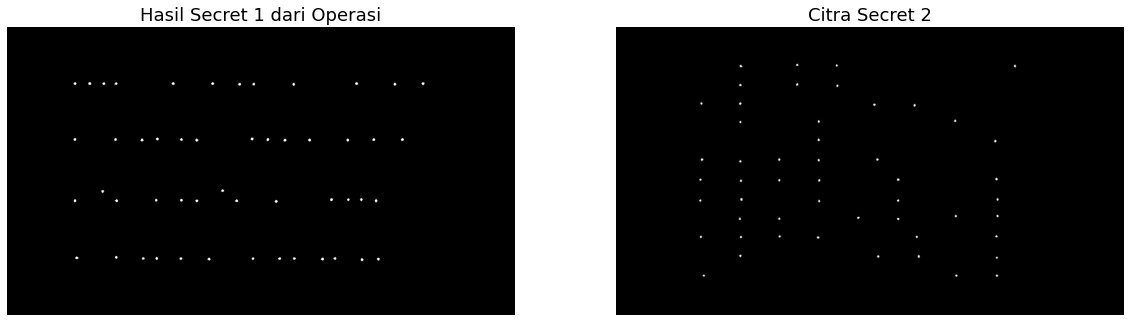

In [26]:
secret11 = color.rgb2gray(io.imread(getPath('secret11.jpg')))
secret2 = color.rgb2gray(io.imread(getPath('secret2.jpg')))
satu = np.ones((18,18))
secret1 = binary_hit_or_miss(secret11, structure1=rectangle(18,18)).astype(np.int)

## Membandingkan hasil secret 2 hasil operasi dan hasil secret 2 yang telah disediakan
plt.figure(figsize=(20,10))
plt.rc('font', size=15)

plt.subplot(1,2,1)
plt.title('Hasil Secret 1 dari Operasi')
plt.imshow(secret1, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Citra Secret 2')
plt.imshow(secret2, cmap='gray')
plt.axis('off')

plt.show()

##### b. Melakukan dilatasi terhadap citra **`secret1`** dan `secret2`.

In [8]:
dilated_secret_1 = []
dilated_secret_2 = []

params = [
    (diamond(25), diamond(15)),
    (rectangle(70,10), rectangle(10,70)),
    (rectangle(10,70), star(10))
]

for param in params:
    a, b = param
    dilated_secret_1.append(dilation(secret1, a))
    dilated_secret_2.append(dilation(secret2, b))

##### c. Menggabungkan kedua citra hasil dilatasi 

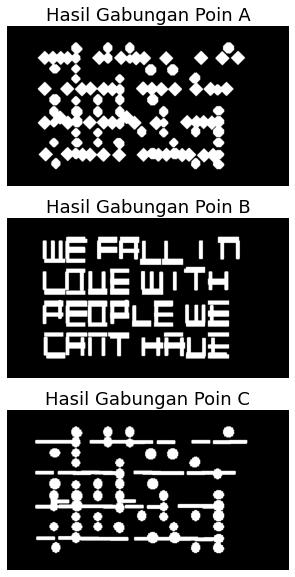

In [29]:
plt.subplots(figsize=(20,10))
plt.rc('font', size=15)

for i in range(len(params)):
    plt.subplot(len(params), 1, i+1)
    plt.title('Hasil Gabungan Poin %c' % (chr(i + ord('A'))))
    secret_combine = np.logical_or(dilated_secret_1[i], dilated_secret_2[i])
    plt.imshow(secret_combine, cmap='gray')
    plt.axis('off')
    
plt.show()

##### d. Tulis pesan rahasia yang didapatkan 

In [10]:
ans = "EVA_H T_NAC__ EW _ELPO___EP_ _HT_IW__ EVO_L N_I _LL_AF_ __EW"
tmp = ans.split('_')
res = ''.join(tmp)
res = res[::-1]
res

'WE FALL IN LOVE WITH PEOPLE WE CANT HAVE'